# Bike data 
## by Marc Wilmsen



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import folium as fm

%matplotlib inline

In [2]:
#Set standard visualization parameters
plt.rcParams['figure.figsize'] = [16, 4]
sns.set_theme(style="whitegrid")

## Preliminary Wrangling

Dataset from the bike rentals in San Fransisco

## Load the dataset 
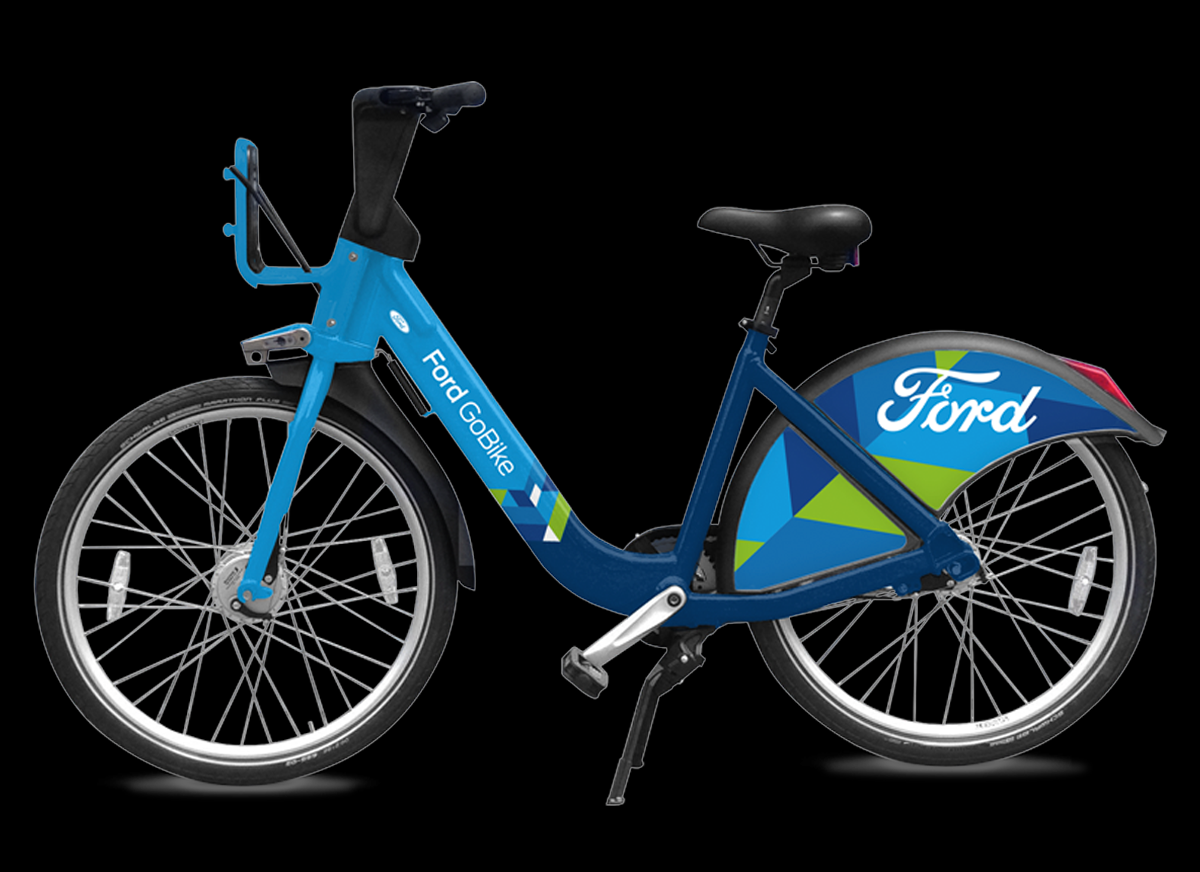

In [3]:
bikes_raw=pd.read_csv('201902-fordgobike-tripdata.csv')
bikes_raw.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

After loading the set, we first do an inspection of the data using basic pandas functions.

In [4]:
bikes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bikes_raw.shape

(183412, 16)

The data set contains sufficiant rows and columns to use. Next get some more details

In [6]:
bikes_raw.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [7]:
bikes_raw.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [8]:
bikes_raw.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Copy the raw data before wrangling the data

In [9]:
bikes= bikes_raw.copy()

## Wrangle the data and visualize it if posible
1. The station id's are float convert it to int32
2. The birth year should be of datetime type
3. The start and end time should be of datetime type
4. The user_type is a categorical type (2 values)
5. The Gender is a catagorical type (3 values)
6. The Bike share for all categorical (Yes/NO)
7. Split the dataframe into 2 frames. One with the rental data one with the station data

### Start with the station id's

In [10]:
#remove all rows in which there is no start or end station
bikes.dropna(subset=['start_station_id', 'end_station_id'],inplace=True)

#convert station_id to a integer
bikes.start_station_id=bikes.start_station_id.astype('int32')
bikes.end_station_id = bikes.end_station_id.astype('int32')
bikes.shape

(183215, 16)

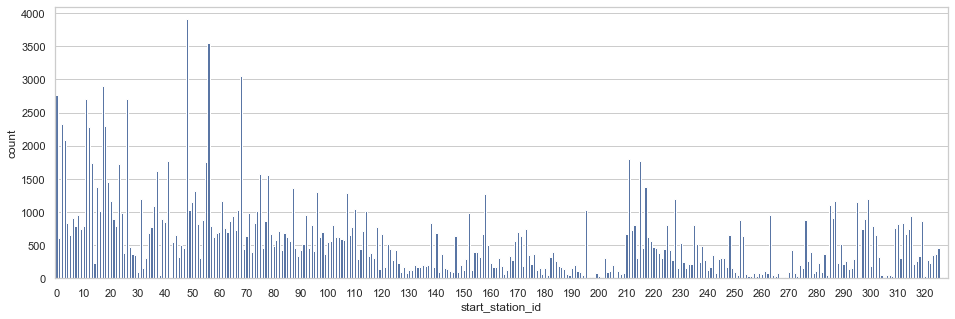

In [11]:
#quick visual to see the number of stations start and end
plt.figure(figsize=(16,5));
ax=sns.countplot(data=bikes,x='start_station_id',color='b');
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

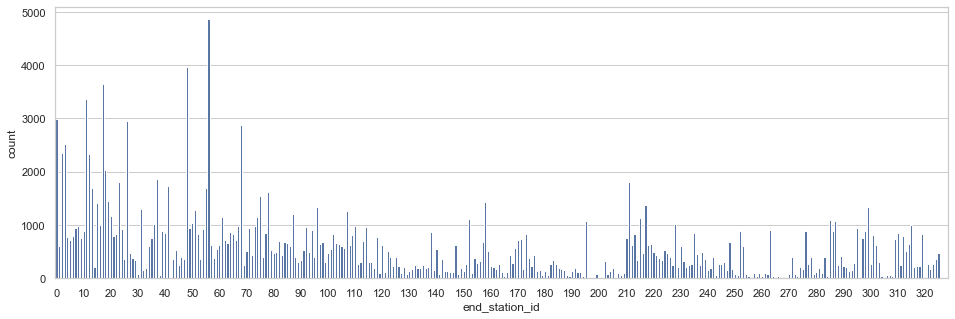

In [12]:
plt.figure(figsize=(16,5));
ax=sns.countplot(data=bikes,x='end_station_id',color='b');
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

As can be seen from the above countplots there is a huge difference between the use of the different stations. Some stations are visited a lot (High peak) some stations are visited only a few times (low peak).

### Change the members birth year in a datetime object

In [13]:
#Convert the year into a datetime object
bikes['member_birth_year']=pd.to_datetime(bikes['member_birth_year'],format="%Y")
bikes.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0                21  Montgomery St BART Station (Market St at 2nd St)   
1                23                     The Embarcadero at Steuart St   
2                86                           Market St at Dolores St   
3               375                           Grove St at Masonic Ave   
4                 7                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811              13   
1               37.791464              -122.391034              81   
2               37.769305              -122.426826               3   
3               37.774836              -122.446546              70   
4               37.804562              -122.271738             222   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type member_birth_year member_gender  \
0            -122.402923     4902    Customer        1984-01-01          Male   
1            -122.393170     2535    Customer               NaT           NaN   
2            -122.404904     5905    Customer        1972-01-01          Male   
3            -122.444293     6638  Subscriber        1989-01-01         Other   
4            -122.248780     4898  Subscriber        1974-01-01          Male   

  bike_share_for_all_trip  
0                      No  
1                      No  
2                      No  
3                      No  
4                     Yes

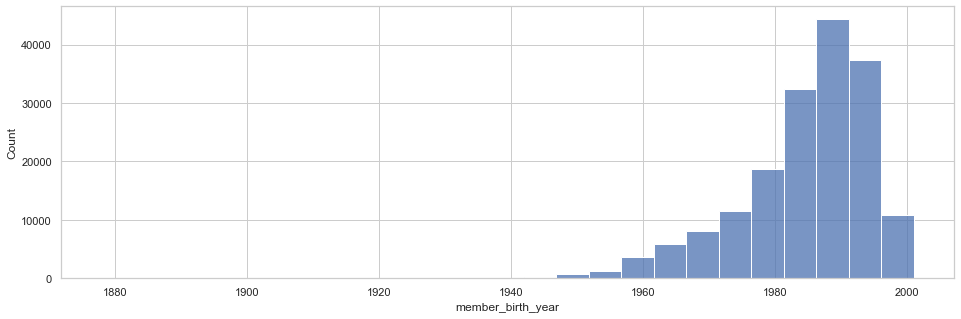

In [14]:
#A histogram to see the spread in the birth years
plt.figure(figsize=(16,5));
ax=sns.histplot(data=bikes,x='member_birth_year',color='b',bins=25);

As we already could observe in the description of the data set we observe it also in the above histogram. Bikes a almost all used by people born in 1960 or later with people born after 1980 are the heavy users.

### Convert the start and end times

In [15]:
bikes.start_time=bikes['start_time'].astype('datetime64')
bikes.end_time=bikes['end_time'].astype('datetime64')
bikes.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0                21  Montgomery St BART Station (Market St at 2nd St)   
1                23                     The Embarcadero at Steuart St   
2                86                           Market St at Dolores St   
3               375                           Grove St at Masonic Ave   
4                 7                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811              13   
1               37.791464              -122.391034              81   
2               37.769305              -122.426826               3   
3               37.774836              -122.446546              70   
4               37.804562              -122.271738             222   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type member_birth_year member_gender  \
0            -122.402923     4902    Customer        1984-01-01          Male   
1            -122.393170     2535    Customer               NaT           NaN   
2            -122.404904     5905    Customer        1972-01-01          Male   
3            -122.444293     6638  Subscriber        1989-01-01         Other   
4            -122.248780     4898  Subscriber        1974-01-01          Male   

  bike_share_for_all_trip  
0                      No  
1                      No  
2                      No  
3                      No  
4                     Yes

In [16]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int32         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  int32         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

As can be seen from the above info listing the fields with date related values are all of type 'datetime'

### Convert user type to catagorical

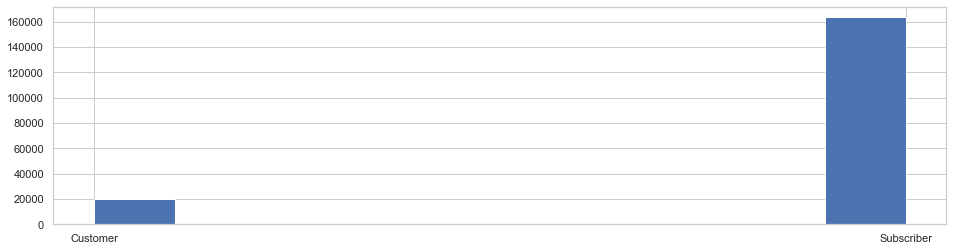

In [17]:
#First what are type different types
bikes.user_type.hist();

In [18]:
#As can be seen from the plot there are two types catagorical could be used 
bikes.user_type=bikes['user_type'].astype('category')


### Change the gender in a catagorical type

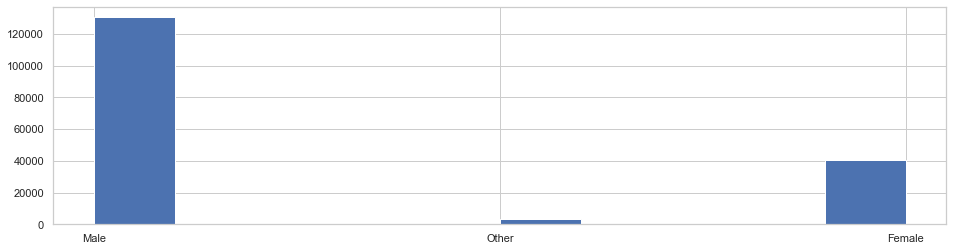

In [19]:
#First what are type different types
bikes.member_gender.hist();

In [20]:
bikes.member_gender=bikes['member_gender'].astype('category')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int32         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  int32         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

In the above listing we see that the member_gender field and the user type both are categorical types.
There are only two type of users (member or customer) and three kinds of gender, beeing Male, Female and other.

### Convert bike_share to categorical


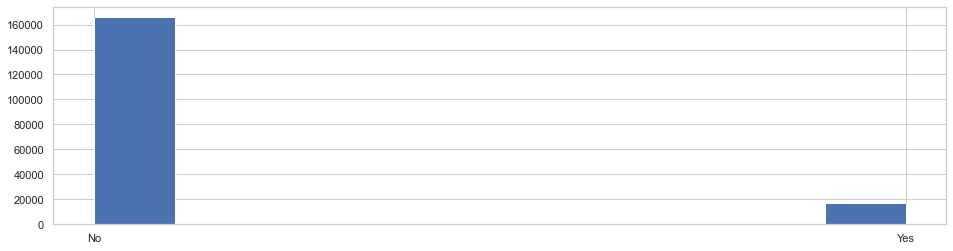

In [21]:
bikes.bike_share_for_all_trip.hist();

In [22]:
bikes.bike_share_for_all_trip = bikes['bike_share_for_all_trip'].astype('category')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int32         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  int32         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

And the last field is also converted to a category type. The bike share fields indicates if a person using the bike is also a person which has little income. As can be found on the website of this bike program. 

### Create two dataframe's one with the station information, one with the rental information

There are a limited number of stations. The dataframe should contain only the station information. We check if the station id's used in start and end are pointing to the same station. If so we can create a very compact station dataframe.

In [23]:
#assume that the id either start or end refers to the same station
#make a dataframe of all start stations
start_station = bikes[['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']].copy()
start_station.drop_duplicates(keep='first',inplace=True)
start_station.shape

(329, 4)

In [24]:
#Doing the same for the end_station
end_station = bikes[['end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']].copy()
end_station.drop_duplicates(keep='first',inplace=True)
end_station.shape

(329, 4)

In [25]:
#make sure the id's point to the same station
stations = pd.merge(start_station,end_station,left_on='start_station_id', right_on='end_station_id')
stations.head()

start_station_id                                start_station_name  \
0                21  Montgomery St BART Station (Market St at 2nd St)   
1                23                     The Embarcadero at Steuart St   
2                86                           Market St at Dolores St   
3               375                           Grove St at Masonic Ave   
4                 7                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811              21   
1               37.791464              -122.391034              23   
2               37.769305              -122.426826              86   
3               37.774836              -122.446546             375   
4               37.804562              -122.271738               7   

                                   end_station_name  end_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)             37.789625   
1                     The Embarcadero at Steuart St             37.791464   
2                           Market St at Dolores St             37.769305   
3                           Grove St at Masonic Ave             37.774836   
4                               Frank H Ogawa Plaza             37.804562   

   end_station_longitude  
0            -122.400811  
1            -122.391034  
2            -122.426826  
3            -122.446546  
4            -122.271738

In [26]:
#If latitude for the start equals the end it is the same station
stations.query(('start_station_latitude != end_station_latitude'))

Empty DataFrame
Columns: [start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude]
Index: []

There are no differences, we conclude they are the same. Therefor we can use the stations dataframe. Drop all unnecessary columns from the bikes dataframe

In [27]:
#drop all columns no longer needed in the bikes and statios dafaframe
stations.drop(columns=['end_station_id','end_station_name','end_station_latitude','end_station_longitude'],inplace=True)
new_names={'start_station_id': 'station_id',
          'start_station_name':'station_name',
          'start_station_latitude': 'station_latitude',
          'start_station_longitude':'station_longitude'}
stations.rename(columns=new_names,inplace=True)
stations.head()

station_id                                      station_name  \
0          21  Montgomery St BART Station (Market St at 2nd St)   
1          23                     The Embarcadero at Steuart St   
2          86                           Market St at Dolores St   
3         375                           Grove St at Masonic Ave   
4           7                               Frank H Ogawa Plaza   

   station_latitude  station_longitude  
0         37.789625        -122.400811  
1         37.791464        -122.391034  
2         37.769305        -122.426826  
3         37.774836        -122.446546  
4         37.804562        -122.271738

In [28]:
stations.shape

(329, 4)

In [29]:
map = fm.Map(location=[37.789625,-122.400811], zoom_start=12)

for point in range(0, len(stations)):
    fm.Marker([stations.iloc[point]['station_latitude'], 
                   stations.iloc[point]['station_longitude']],icon=fm.Icon(color='green'),
             popup=stations.iloc[point]['station_name']).add_to(map)
map

Now we have a station dataframe. All station information can be removed from the bikes datafram creating a rental only dataframe.


In [30]:
bikes.drop(columns=['start_station_name','start_station_latitude','start_station_longitude'],inplace=True)
bikes.drop(columns=['end_station_name','end_station_latitude','end_station_longitude'],inplace=True)

In [31]:
bikes.sample(10)

duration_sec              start_time                end_time  \
30857           1156 2019-02-24 18:01:23.062 2019-02-24 18:20:40.001   
59371           1455 2019-02-20 20:07:06.407 2019-02-20 20:31:21.712   
126612           982 2019-02-10 18:04:23.196 2019-02-10 18:20:46.049   
50405            937 2019-02-21 19:06:21.531 2019-02-21 19:21:58.607   
129815           531 2019-02-10 02:05:17.866 2019-02-10 02:14:08.992   
1732             641 2019-02-28 18:43:07.191 2019-02-28 18:53:48.634   
152368           781 2019-02-06 15:52:07.205 2019-02-06 16:05:08.411   
95276           1263 2019-02-15 14:11:07.789 2019-02-15 14:32:10.975   
66394           1331 2019-02-20 08:32:18.268 2019-02-20 08:54:29.934   
121560           306 2019-02-11 14:51:58.434 2019-02-11 14:57:04.616   

        start_station_id  end_station_id  bike_id   user_type  \
30857                  6               5     6328    Customer   
59371                109             106     6591    Customer   
126612                80             350     2566    Customer   
50405                 20              74     6482  Subscriber   
129815                75               5     2360    Customer   
1732                  33              91     5107  Subscriber   
152368               102             284     4351  Subscriber   
95276                 44              33     5108  Subscriber   
66394                377              81     5820  Subscriber   
121560               109             121     2628    Customer   

       member_birth_year member_gender bike_share_for_all_trip  
30857         1994-01-01        Female                      No  
59371         1989-01-01          Male                      No  
126612               NaT           NaN                      No  
50405         1997-01-01          Male                      No  
129815               NaT           NaN                      No  
1732          1990-01-01          Male                      No  
152368        1980-01-01        Female                      No  
95276         1995-01-01          Male                      No  
66394         1988-01-01          Male                      No  
121560        2000-01-01          Male                      No

In [32]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int32         
 4   end_station_id           183215 non-null  int32         
 5   bike_id                  183215 non-null  int64         
 6   user_type                183215 non-null  category      
 7   member_birth_year        174952 non-null  datetime64[ns]
 8   member_gender            174952 non-null  category      
 9   bike_share_for_all_trip  183215 non-null  category      
dtypes: category(3), datetime64[ns](3), int32(2), int64(2)
memory usage: 15.3 MB


For exploration of the data the start day and start hour are used in two new fields with the day of the week and the starting hour.

In [33]:
bikes['day']=bikes.start_time.dt.dayofweek
dw_map={
    0: 'Mon', 
    1: 'Tue', 
    2: 'Wed', 
    3: 'Thu', 
    4: 'Fri',
    5: 'Sat', 
    6: 'Sun'
}
bikes['day']=bikes.day.map(dw_map)
bikes['hour']=bikes.start_time.dt.hour
bikes.sample(5)

duration_sec              start_time                end_time  \
5966             361 2019-02-28 11:39:38.498 2019-02-28 11:45:40.146   
12860            371 2019-02-27 17:12:28.636 2019-02-27 17:18:39.657   
112414           224 2019-02-12 15:35:28.700 2019-02-12 15:39:13.171   
79557            921 2019-02-18 17:15:08.630 2019-02-18 17:30:30.517   
181445          1206 2019-02-01 08:58:44.510 2019-02-01 09:18:50.777   

        start_station_id  end_station_id  bike_id   user_type  \
5966                  74              44     3303  Subscriber   
12860                 27              66     5826  Subscriber   
112414               239             247      655  Subscriber   
79557                377              84     4370  Subscriber   
181445                39             350     1334  Subscriber   

       member_birth_year member_gender bike_share_for_all_trip  day  hour  
5966          1977-01-01          Male                     Yes  Thu    11  
12860         1988-01-01          Male                      No  Wed    17  
112414        1999-01-01          Male                     Yes  Tue    15  
79557         1986-01-01        Female                      No  Mon    17  
181445        1990-01-01        Female                      No  Fri     8

In [34]:
bikes.shape

(183215, 12)

### The structure of  dataset

After the first cleaning of the data we have now two datasets with data which will be used for further investigation.
1. We see the duration on the rental period {duration_sec} with the start {start_time} and end time {end_time} of the rental period.
2. We see at which station the bike is rented {start_station_id} and where it is given back {end-station_id}
3. There is information about the bike {bike_id}
4. There is information on the person renting the bike such as type of user {user_type} the gender {member_gender} and his year of birth {member_birth_year}

### The main feature(s) of interest

The data sets contains a lot of rental information. The questions which i would like to answer is the following:
> Distinguish between the different generations in terms off
1. number of rides
2. traveled distance
3. gender
4. user type

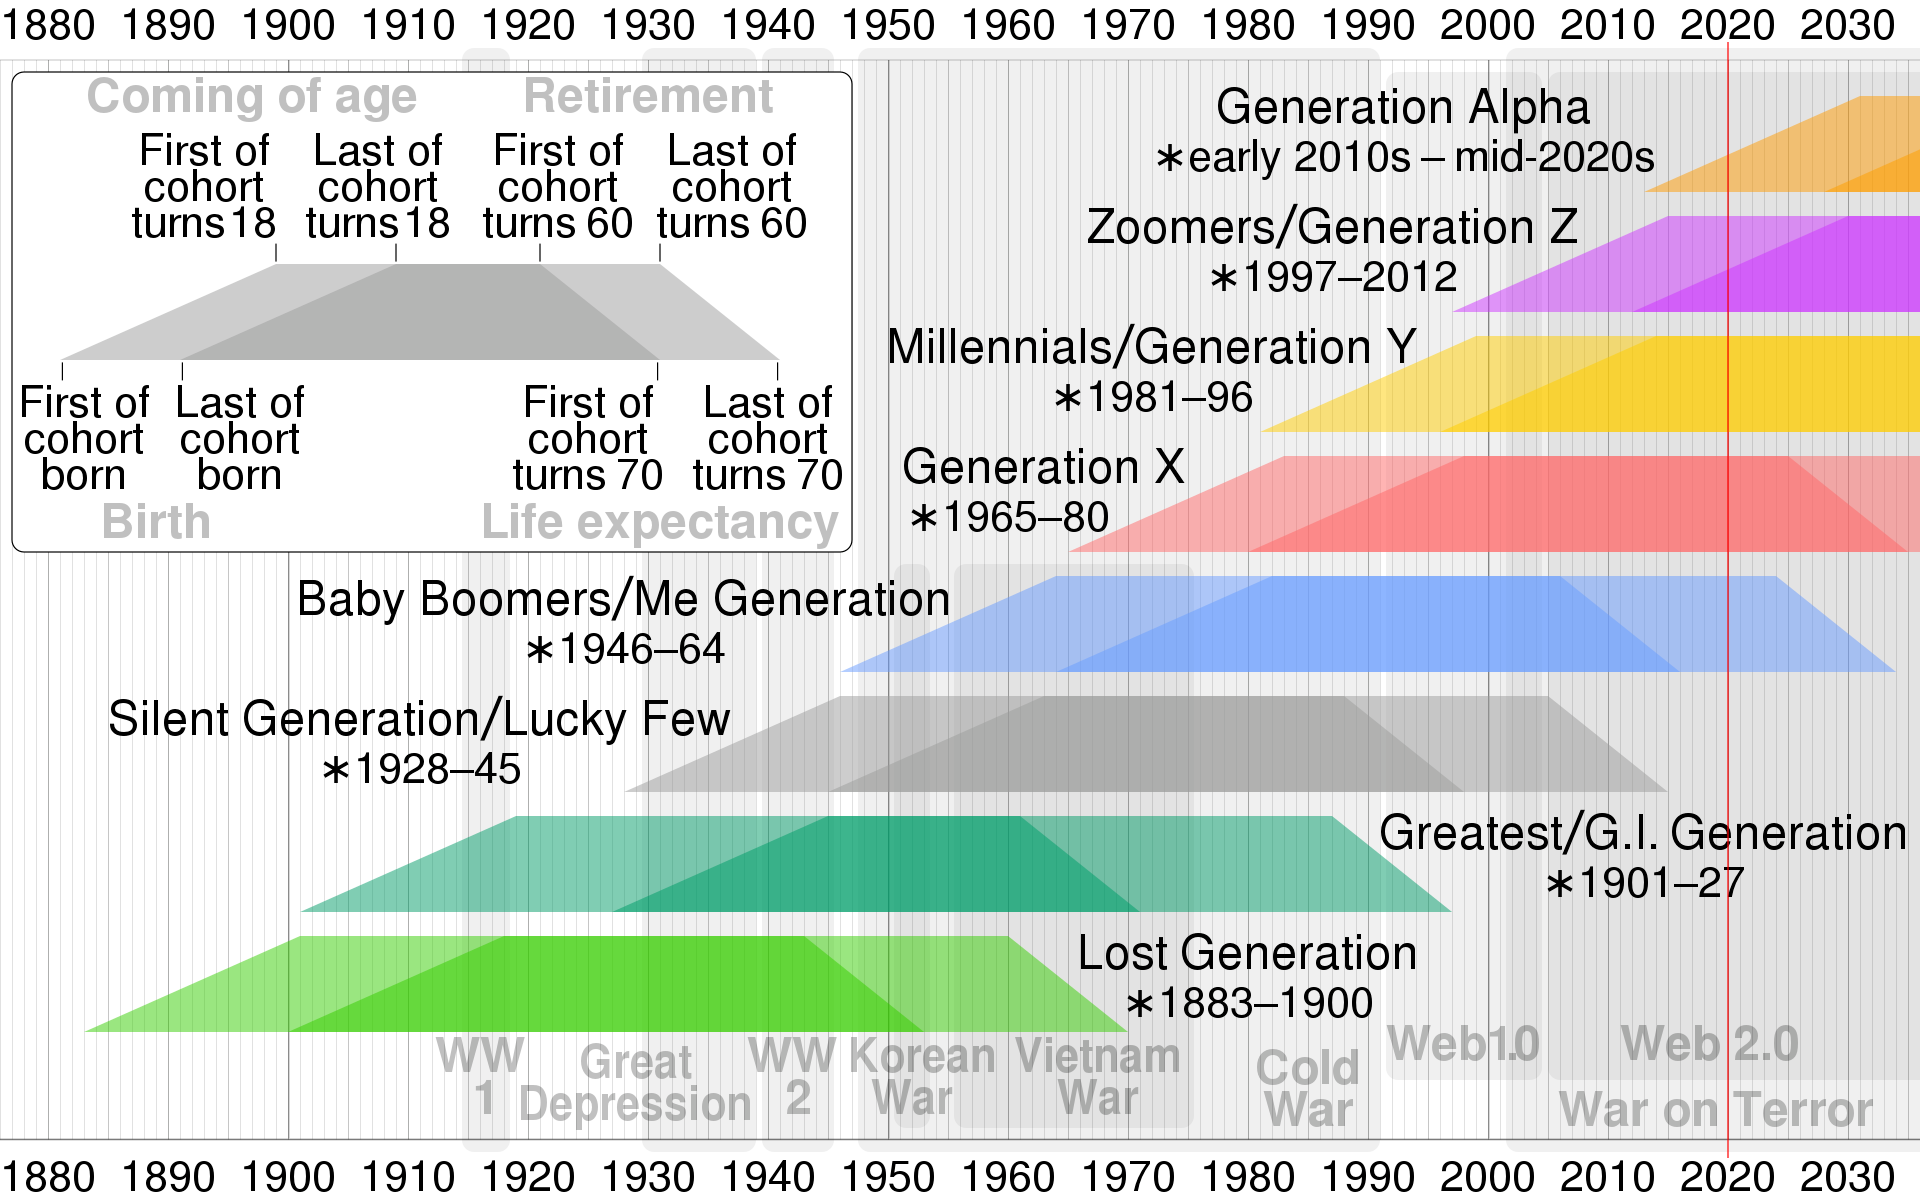



### The folowing features in the dataset can be of interest:
- Gender
- Birth year
- Duration
- Stations rented


## Univariate Exploration

Allmost all features in the set will be investigated. With special attention to the features of interest

First of all create some functions for plotting and generation detection.


In [35]:
# define a plot with ,the values on top of the bar's. 
# The bar's are relative counts 0-100%
def plot_bar (x,y,data):
    df1 = data.groupby(x)[y].value_counts(normalize=True,dropna=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
    return 0

#define the generation based on the birthyear.
#returns the Generation X,Y,X, the baby boomers and if not in one of those it return Other
def generation(x):
    
    if x in range(1965,1980):
        return 'X'
    elif x in range(1981,1996):
        return 'Y'
    elif x in range(1997,2012):
        return 'Z'
    elif x in range(1946,1964):
        return 'Baby boomer'
    elif x in range(1928,1945):
        return 'Luky few'
    elif x in range(2013-2020):
        return 'Kids'
    else:
        return 'Other'


In [36]:
#Function to show the count of a field including the percentage
def percent_plot(veld,data,titel):
    ax = sns.countplot(x=veld, data=bikes, color='b')
    plt.title(titel)
    plt.xlabel('')
    
    total = len(data['user_type'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height()/2
        x = p.get_x() + p.get_width()/2
        ax.annotate(percentage, (x, y))

    plt.show()
    
    return 0



### Generation
As we are interested in generation. We will first of all create a generation field in the dataset.

Create the generations X, Y, Z and Baby boomers store them in a seperate field.

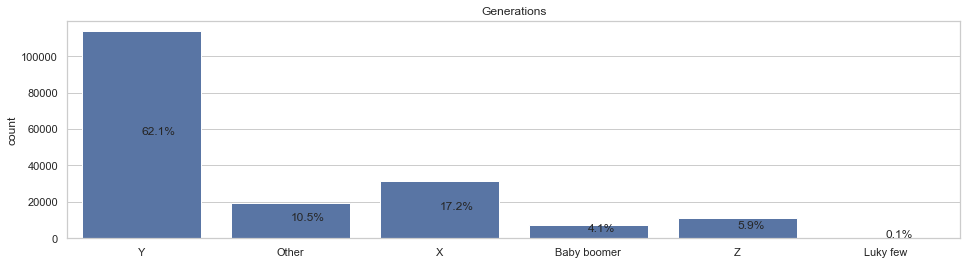

In [37]:
#The generation function calculates the generation depening on the year of birth.
bikes['generation']=bikes.member_birth_year.dt.year.apply(generation)

#show them
percent_plot('generation',bikes,'Generations');

The Y generation is the largest group by far, Followed bij the X and Z generation, Baby boomers is small and the luky few are realy a few  ones.
The other group we drop as there is no valid year of birth. The luck few are to small also droped. 

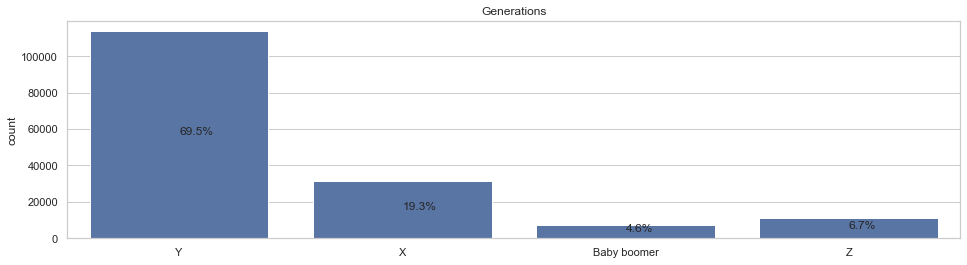

In [38]:
#remove the Other.
droplist=bikes.query('generation == "Other"').index
bikes.drop(droplist,inplace=True)

#remove the luky few
#remove the Other.
droplist=bikes.query('generation == "Luky few"').index
bikes.drop(droplist,inplace=True)

percent_plot('generation',bikes,'Generations');

We have the dataset with the four generations in which the Y generation by far is the largest one.

In [39]:
bikes.shape

(163745, 13)

### Gender
Next we look into the gender

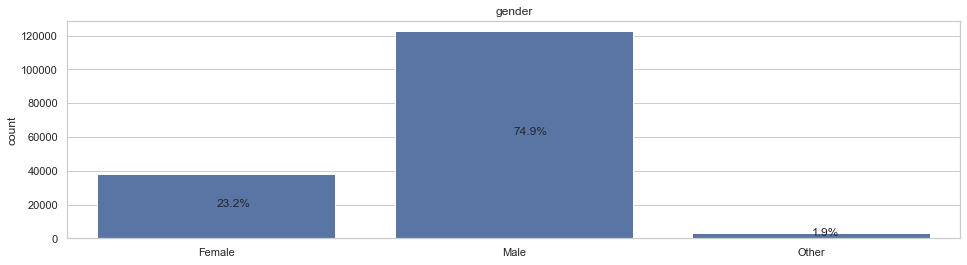

In [40]:
percent_plot('member_gender',bikes,'gender');

We have a smalle percentage bike rides with the gender type beeing Other. These will be droped from the dataset they are too small. We also remove rows without a birth year.

In [41]:
#remove the unknown
bikes.dropna(axis=0,how='any',inplace=True)

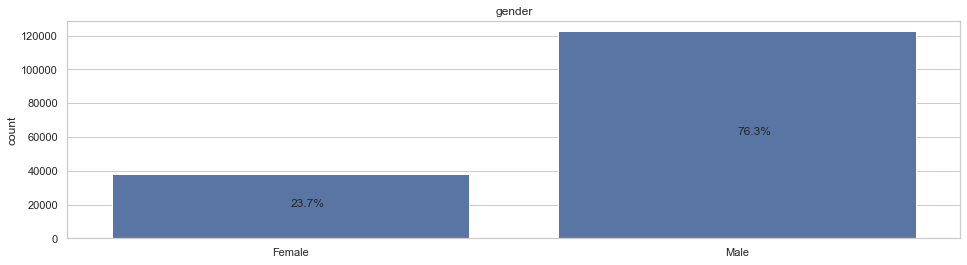

In [42]:
#remove the Other.
droplist=bikes.query('member_gender == "Other"').index
bikes.drop(droplist,inplace=True)

#reset the category
gender_class=['Female','Male']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = gender_class)
bikes['member_gender'] = bikes['member_gender'].astype(vclasses)

percent_plot('member_gender',bikes,'gender');

In [43]:
bikes.shape

(160565, 13)

In [44]:
bikes.member_gender.value_counts()

Male      122574
Female     37991
Name: member_gender, dtype: int64

The ratio Males/Females is 3:1 We will use this ratio in the further part of the exploration

### Duration

How long is the bike ride?

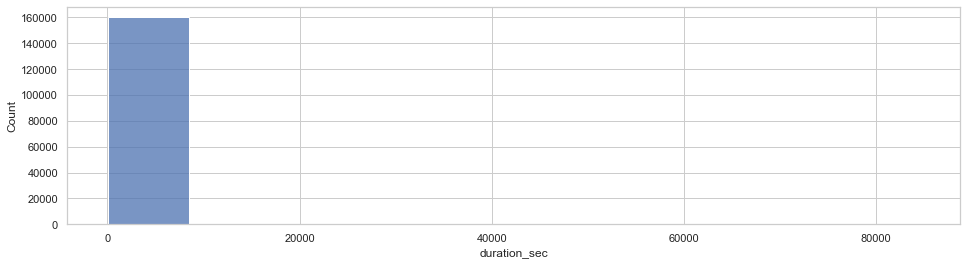

In [45]:
sns.histplot(data=bikes,x='duration_sec', bins=10, color='b');

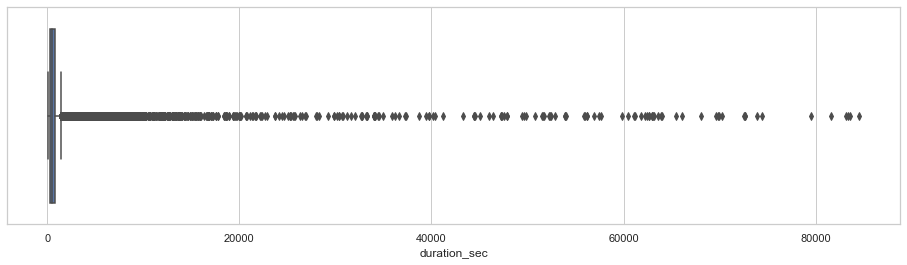

In [46]:
sns.boxplot(data=bikes,x='duration_sec');

In [47]:
bikes.duration_sec.describe()

count    160565.000000
mean        698.106156
std        1567.797027
min          61.000000
25%         323.000000
50%         510.000000
75%         787.000000
max       84548.000000
Name: duration_sec, dtype: float64

The duration off a trip seems to be short as seen from the visuals and the statistics. To get a better picture, we set a limit on the visual to see more detail.

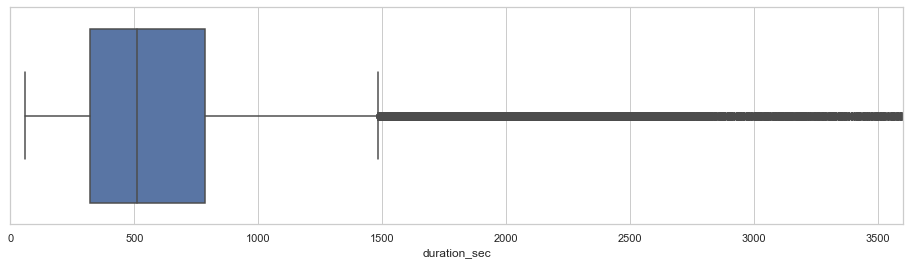

In [48]:
#Limit the visual to 1 hour trips, making it more detailed
plt.xlim(0,3600)
sns.boxplot(data=bikes,x='duration_sec');

Indeed we observe a huge number of trips below the 1500 seconds (which is less then 1/2 hour) and a number of outliers. later on we will investigate if these outliers are depending on the user type.

The difference between the 75% (787 second) and the max (85444) is very large. We check the spread of the top values


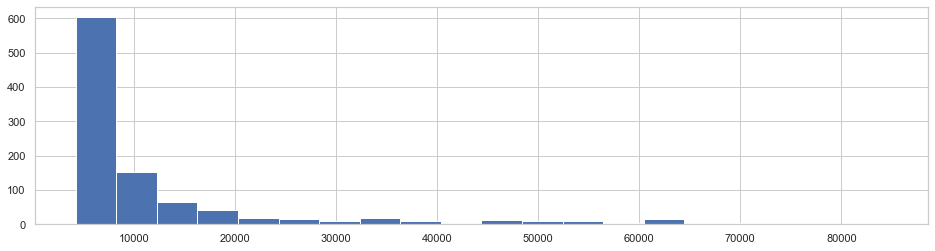

In [49]:
bikes.duration_sec.nlargest(1000).hist(bins=20); # the top 1000 

Again we can observe that from the top 1000 trips the main part is below 10.000 seconds.

### Start and end time
Most of the trips end within 1500 seconds therefore the end time will be no more then half hour later then the start time, giving a simular distribution. For now we look at the start times. 
First check the date range

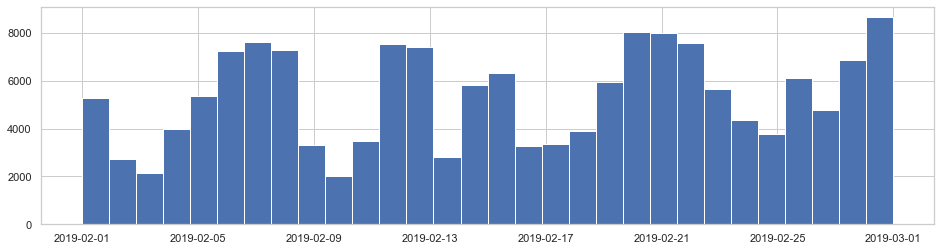

In [50]:
bikes.start_time.hist(bins=30);

The data is from a full month which is not detailed enough. Will make it more detailed:
1. Which day of the week has more trips
2. Which hours has more trips

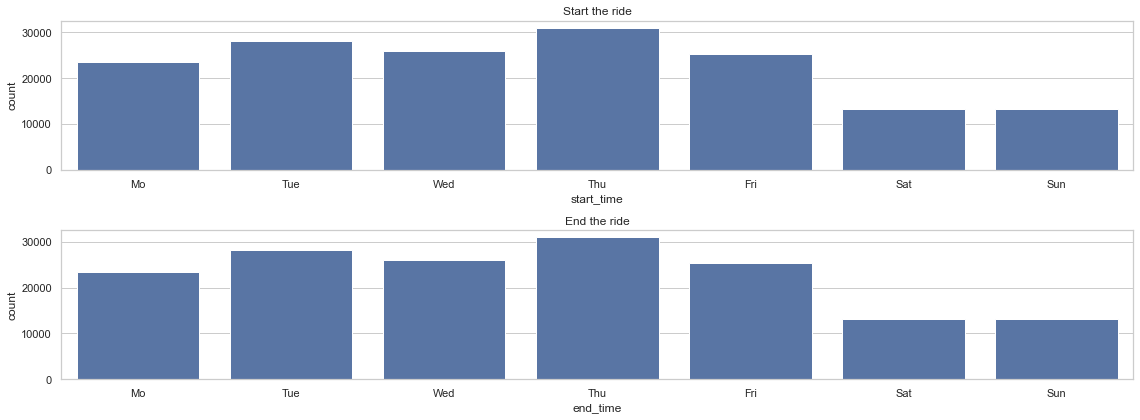

In [51]:
#Extract the day of the week and plot it
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
g=sns.countplot(x=bikes.start_time.dt.dayofweek,color='b');
g.set_xticklabels(['Mo','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Start the ride");

plt.subplot(2,1,2)
z=sns.countplot(x=bikes.end_time.dt.dayofweek,color='b');
z.set_xticklabels(['Mo','Tue','Wed','Thu','Fri','Sat','Sun']);
plt.title("End the ride");
plt.tight_layout();

As can be observed monday up to Friday are more busy then the two weekend days.

Next investigate the time of day.

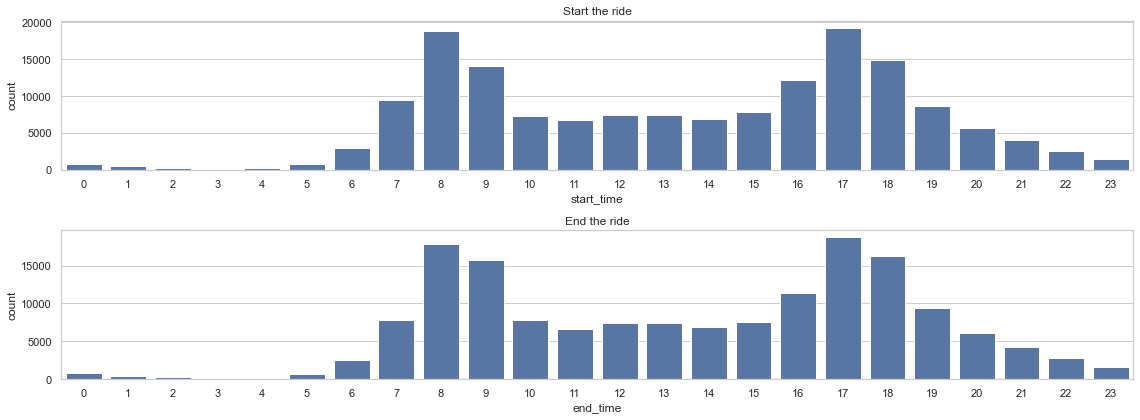

In [52]:
#extract the hour of the week and plot it
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
sns.countplot(x=bikes.start_time.dt.hour,color='b');
plt.title("Start the ride");

plt.subplot(2,1,2)
sns.countplot(x=bikes.end_time.dt.hour,color='b');
plt.title("End the ride");
plt.tight_layout()

For both the start and end time we observe a simular pattern. With two peaks one in the morning (8-9) and one in the evening (17-18). We also observe a small shift between the start and end time which is logical as one starts before ending.

Lets explore the user type and the bike share columns

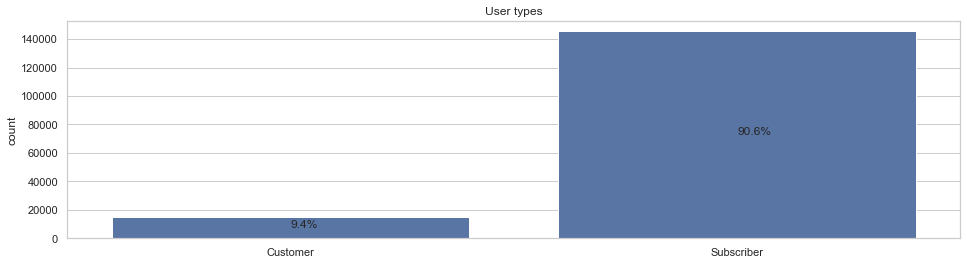

In [53]:
percent_plot('user_type',bikes,"User types");

Subscribers are the dominant group in the data set, let see what we can tell about the bike share program

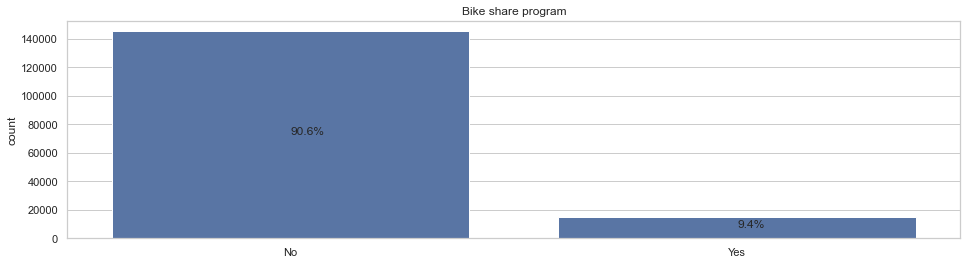

In [54]:
percent_plot('bike_share_for_all_trip',bikes,'Bike share program');

Most rides are bij people not beeing part of the bike share program. 

The data set contains only males and females with approximatly 1/4 females 3/4 males. Last feature to investigate is the station usage. in the wrangling part we had alread a plot of the station usage from which we van learn that there is a great difference in usage.

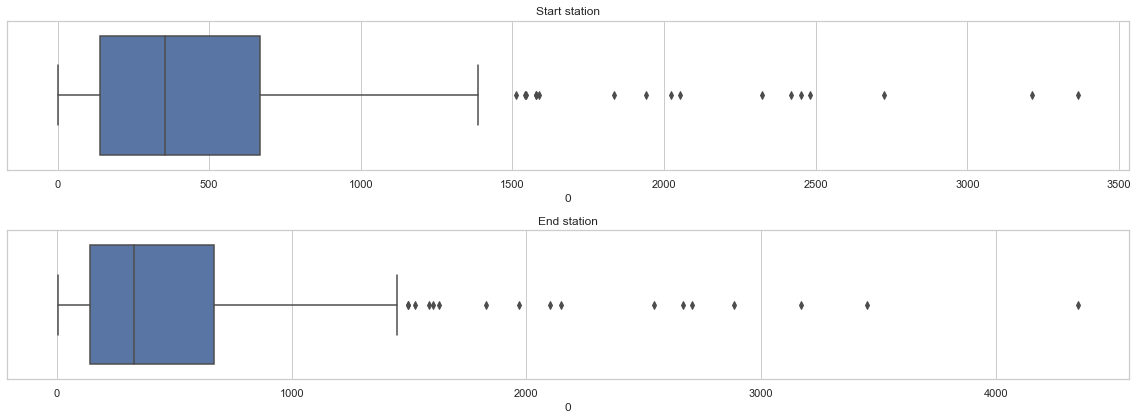

In [55]:
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
#count for each station ID the number of times it appears in the data set and plot this.
start_station_list=pd.DataFrame(bikes.groupby(['start_station_id']).size().reset_index())
sns.boxplot(data=start_station_list,x=0);
plt.title('Start station');

plt.subplot(2,1,2)
end_station_list=pd.DataFrame(bikes.groupby(['end_station_id']).size().reset_index())
sns.boxplot(data=end_station_list,x=0);
plt.title('End station');
plt.tight_layout();

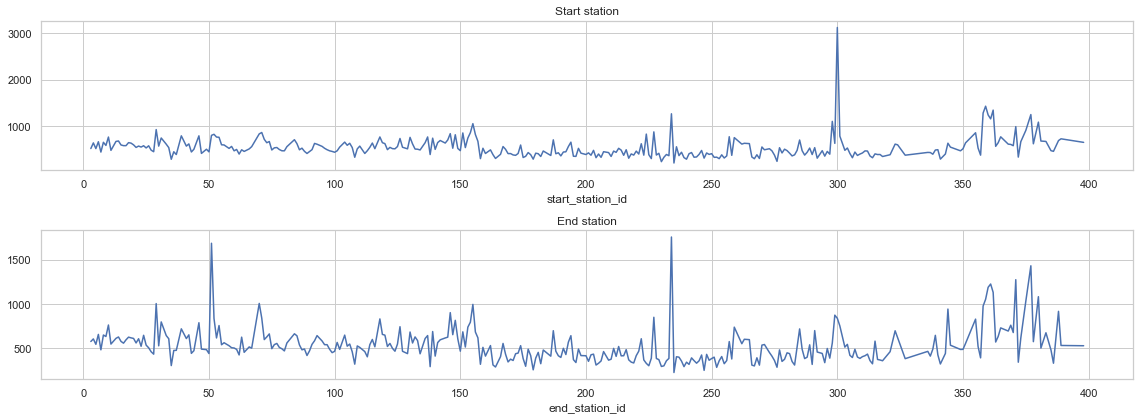

In [56]:
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
#get the mean traveling duration depending on the station.
bikes.groupby(['start_station_id'])['duration_sec'].median().plot()

plt.title('Start station');

plt.subplot(2,1,2)
bikes.groupby(['end_station_id'])['duration_sec'].median().plot()

plt.title('End station');
plt.tight_layout()

As can be observed 75% of the stations are used less then 1500 times. With a difference between the start and end stations. 
The spread of the starting stations is larger then for the ending stations in terms of usage. Both have a number of outlines which will be investigated in following parts. We also observe that the duartion time associated with starting or ending at a particular station varies and there seems not to be a relation between start and end.

### Some Univariant observations

#### Generation (or year of birth)

> After grouping the dataset into generations we could observe that most fall in one of four generation types X,Y,Z and the baby boomers. All datarows not falling in one of those four groups are removed from the dataset.

#### Trip duration

> The duration of the trips in general short. 3/4 off all trips is below 15 minutes. There is a difference in duration depending on the station from or to. A small portion of the trips are lasting allmost all day. In the next section this will investigated further.

#### Starting & ending a trip

> The start and end time show very simular patterns. The week days have more trips as compared to the weekend. In the morning and in the evening we see two peaks in the number of trips.
We see a number of longer trips. In the next step we will check if they are connected to a certain day of week.

#### Start & end station

> As seen in the visualisation in the wrangling part, there are stations with a lot of rentals and others with lower number of rentals. There is a difference in spread between the starting stations and the ending stations. This is a point of interest in the next section.

#### Users

> Most of the rides are by males. There are more members then customers. Most rides are not part of the bike share program.

#### Gender
> There are more males then females using in the bikes share program. The data contains a number of rows without gender information and a small numer of rows with other gender. For the exploration only Males and Femals are needed. The empty rows and the rows with Other are droped from the data.


### clean & tidy

> After the first checking on variables we found with the duration that most rides are short, but a number of them are longer. At this point it is to early to remove the longer rides as it could be from customers which will be checked. 

The gender, The User type, The Bike share are all features with two possible values. In the following parts we will have spceial attention for the relative proportions each time we explore it in a  bivariant exploration.



## Bivariate Exploration

We are intrested in the question if there are difference between the generations.

### Generation in relation to the other fields
Start with exploring the generation in relation to the other features of interest.


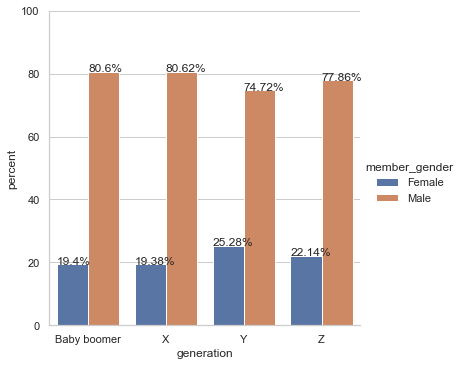

In [57]:
plot_bar('generation','member_gender',bikes);

The ratio males/females is 76/24 in all 4 groups  we see small differences in the ratio. Lets do the same for the user type.

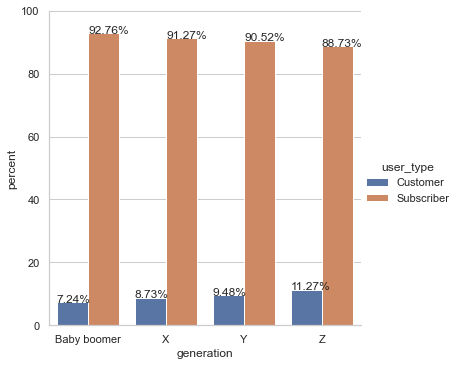

In [58]:
plot_bar('generation','user_type',bikes);

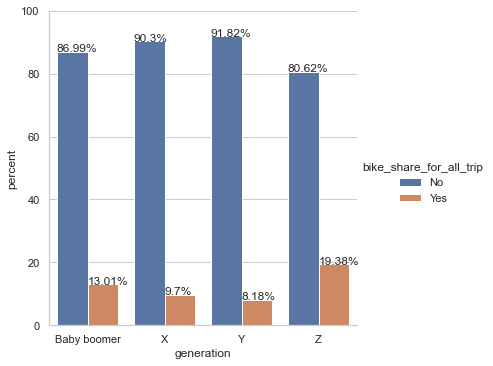

In [59]:
plot_bar('generation','bike_share_for_all_trip',bikes);

This is interesting, the Generation Z has almost 2 times the number of bike share participants compared to the total data set. 

Bikes are used to travel between two destinations. Let explore the duration of the rides for the generations.

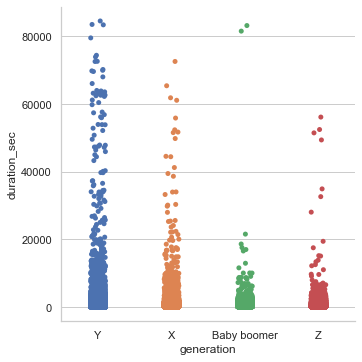

In [60]:
sns.catplot(y='duration_sec',x='generation',data=bikes,kind='strip');

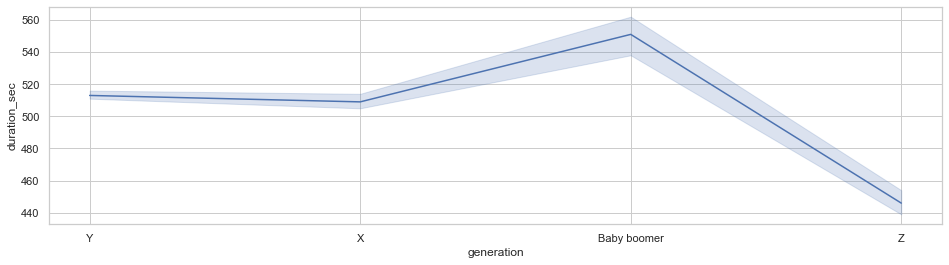

In [61]:
sns.lineplot(x='generation',y='duration_sec',data=bikes, estimator=np.median);

Generation Y is the largest group in the data set, they travel longer then the X and Y. The baby boomers travel longer distances as can be seen from the two plots above.

Next lets explore the relation between the generation and the start/end station.

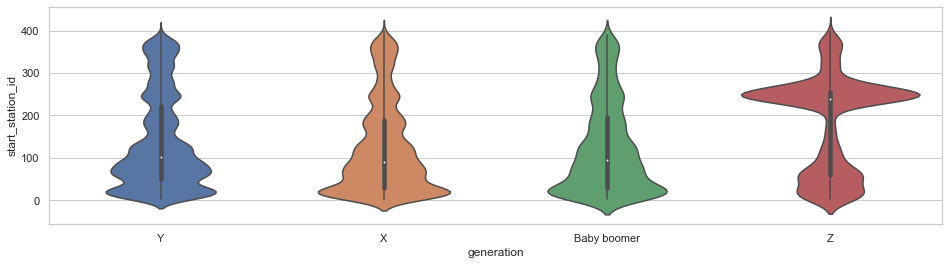

In [62]:
sns.violinplot(y='start_station_id',x='generation',data=bikes);

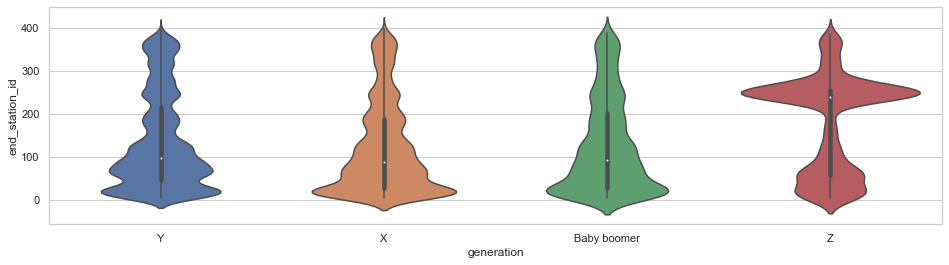

In [63]:
sns.violinplot(y='end_station_id',x='generation',data=bikes);

The Z generation has certainly other start and end stations then the X and Y generation. There is a smalle difference between the Y and X generation.Babyboomers follows a simular patern as the X and Y. The other's group is somewhat different from the X,Y,Z and Baby

Lets plot color code markers on the map. The color will be chosen depending on the generation with the highest number of startes in a station. The highest number is of course relative to the size of the generation group.
- The start station is a set
- The end station is  a set
- A set where start and end station have the same generation.

In [64]:
totals=pd.DataFrame(bikes.groupby(['start_station_id','generation']).size().reset_index()).groupby('generation').sum()

#First set the total number of eacht generation type
#the totals are the same for the start & and stations because the bike user is the same for each row.
#we are grouping on start station/end_station which can have different counts but all the different counts add up to
#the same total.
Baby_count=totals.loc['Baby boomer',0]
X_count=totals.loc['X',0]
Y_count=totals.loc['Y',0]
Z_count=totals.loc['Z',0]

In [84]:
# Next create a dataframe with for each station the start/end station id per generation subset
start_station_list=pd.DataFrame(bikes.groupby(['start_station_id','generation']).size().reset_index())
end_station_list=pd.DataFrame(bikes.groupby(['end_station_id','generation']).size().reset_index())

# working relative which means dividing the found numbers of starters per generation type by the size of the gneration subset.
def set_station_count(generation,x):
    if 'Baby boomer' in generation:
        return x/Baby_count
    if 'X' in generation:
        return x/X_count
    elif 'Y' in generation:
        return x/Y_count
    elif 'Z' in generation:
        return x/Z_count
    else:
        return 0

# apply the function to each row creating the relative count perstation.
# below X[0] is the column with the number of starts for the partiular station
start_station_list['relative']=start_station_list.apply(lambda x: set_station_count(x['generation'],x[0]),
                                            axis=1)
end_station_list['relative']=end_station_list.apply(lambda x: set_station_count(x['generation'],x[0]),
                                            axis=1)


In [85]:
#find per station the generation with the highest number of starters and color it accordingly.
#X,Y,Z, baby, others
# working relative which means dividing the found numbers of starters per generation type by the size of the gneration subset.
def set_station_color(generation):
    if 'Baby boomer' in generation:
        return 'pink'
    elif 'X' in generation:
        return 'red'
    elif 'Y' in generation:
        return 'green'
    elif 'Z' in generation:
        return 'blue'
    else:
        return 'black'


#create list with all station id's
station_id_list=start_station_list.start_station_id.unique().tolist()

#Create a dictionairy with key = station id and value the color
start_color_dict={}
end_color_dict={}
color_dict={}
start_end_equal=0
#Walk to the list and get the max value per station
for ident in station_id_list:
    # get the row with the highest value
    start_row=start_station_list[start_station_list['start_station_id']== ident]['relative'].argmax()
    end_row=end_station_list[end_station_list['end_station_id']== ident]['relative'].argmax()
    
    #with the row get the generation
    start_gen=start_station_list[start_station_list['start_station_id']== ident]['generation'].iloc[start_row]
    end_gen=end_station_list[end_station_list['end_station_id']== ident]['generation'].iloc[end_row]
    
    #add the color to the station_id
    start_color_dict[ident]= set_station_color(start_gen)
    end_color_dict[ident]= set_station_color(end_gen)
    #If start and end are equal add the color to the color dict if not color it orange
    if start_gen==end_gen:
        color_dict[ident]=set_station_color(start_gen)
        start_end_equal +=1
    else:
        color_dict[ident]='orange'
        
print('Number of equal start end is: {} out of {} stations'.format(start_end_equal,len(station_id_list)))

Number of equal start end is: 243 out of 329 stations


In [89]:
#The is the map with start and end not equal
map1 = fm.Map(location=[37.789625,-122.400811], zoom_start=12)

for point in range(0, len(stations)):
    if color_dict[stations.iloc[point]['station_id']] in ['black','orange']:
        fm.Marker([stations.iloc[point]['station_latitude'],
                   stations.iloc[point]['station_longitude']],
                  icon=fm.Icon(color_dict[stations.iloc[point]['station_id']]),
                 popup=stations.iloc[point]['station_name']).add_to(map1)
map1

In [87]:
#The map with the end stations
map2 = fm.Map(location=[37.789625,-122.400811], zoom_start=12)

for point in range(0, len(stations)):
    if end_color_dict[stations.iloc[point]['station_id']] not in ['black']:
        fm.Marker([stations.iloc[point]['station_latitude'],
                   stations.iloc[point]['station_longitude']],
                  icon=fm.Icon(end_color_dict[stations.iloc[point]['station_id']]),
                 popup=stations.iloc[point]['station_name']).add_to(map2)
map2

In [88]:
#The map with the start stations
map3 = fm.Map(location=[37.789625,-122.400811], zoom_start=12)

for point in range(0, len(stations)):
    #The if construct gives the possibility to select a partiular color, we start with all colors. 
    # ['red','blue','green','black','white']
    if start_color_dict[stations.iloc[point]['station_id']] not in ['black']:
        fm.Marker([stations.iloc[point]['station_latitude'],
                   stations.iloc[point]['station_longitude']],
                  icon=fm.Icon(start_color_dict[stations.iloc[point]['station_id']]),
                 popup=stations.iloc[point]['station_name']).add_to(map3)
map3

We observe a lot of colors. When playing with the colors/generations we see that the Z-generation (blue) have a lot of starting points arround the berkley University. We see also two spots of Y-generations one arround the golden gate avenue one arround the James lick freeway. The X generation occupies other parts of the city.

We can observe that the baby boomers have a greater part of the end stations, seems that they travel in more different directions.

Next we explore the time of day/week when the generations ride the bikes.

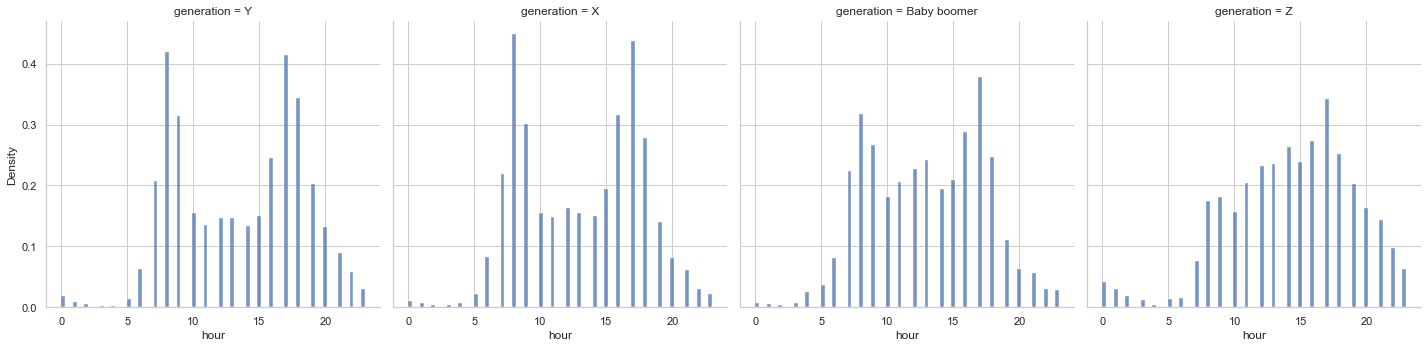

In [70]:
day_order=['Mon',  'Tue',      'Wed',      'Thu',      'Fri',     'Sat',      'Sun']
sns.displot(bikes, x='hour', col="generation",stat="density",common_norm=False);

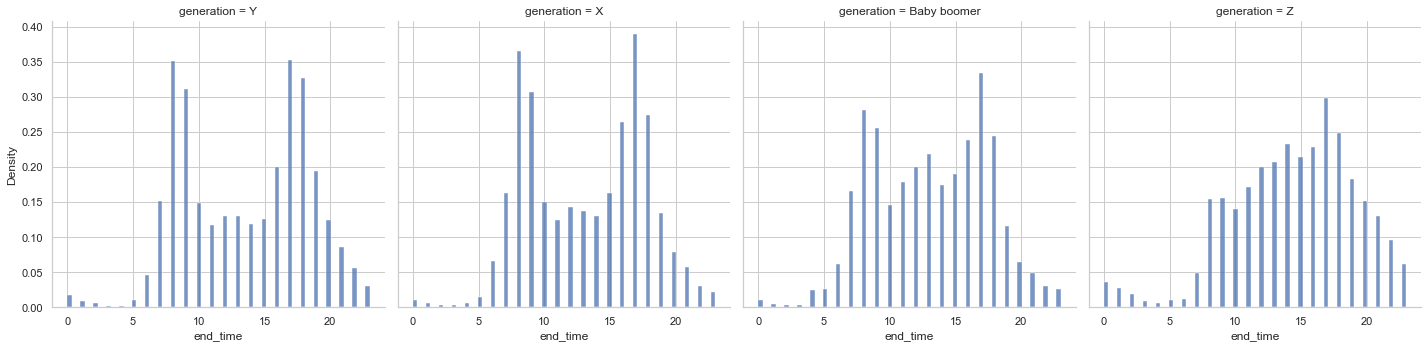

In [71]:
sns.displot(bikes, x=bikes.end_time.dt.hour, col="generation",stat="density", common_norm=False);

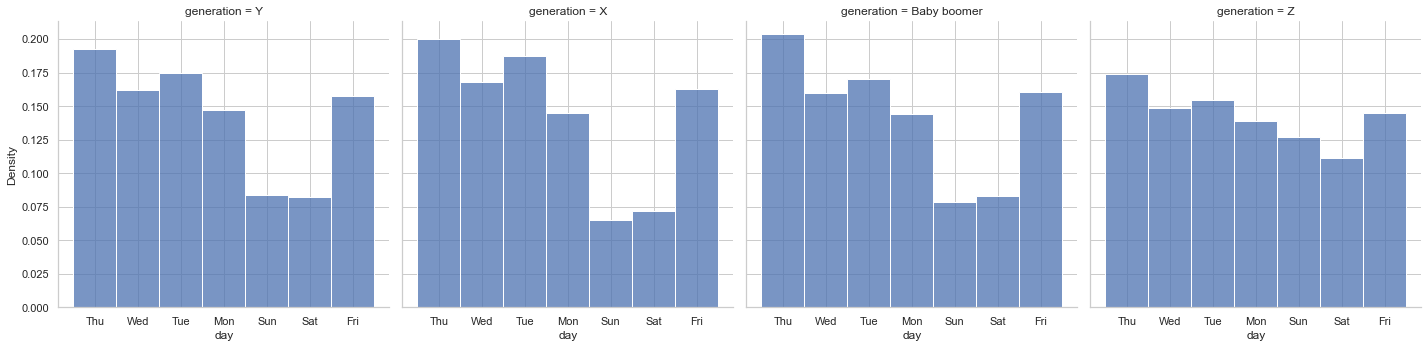

In [72]:
sns.displot(bikes, x='day', col="generation",stat="density",common_norm=False);

Generation X and Y are simular in the ussage of the bikes They have peaks in the morning and evening and they travvel less in the weekend. The baby boomers have stillmore usage in the morning and evening around the same time as the X and y generation however they have in between a higher usage. Generation Z rides in the weekends more than the other generations and have there ussage peak in the evening.

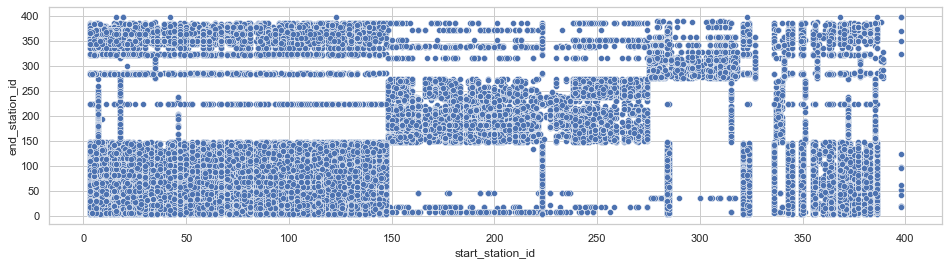

In [73]:
# observe the relation between start and end station
sns.scatterplot(data=bikes,x='start_station_id',y='end_station_id');

We can observe that starting from one station does not mean that rides end in all stations. The white spaces indicate this. For example starting in stations 1 through 150 means ending  mainly in 1 through 150 and 325 through 400 the stations in between are not reached from that starting points (with some exceptions).

In the following part we explore relations between other fields. Starting with duration and time of day.

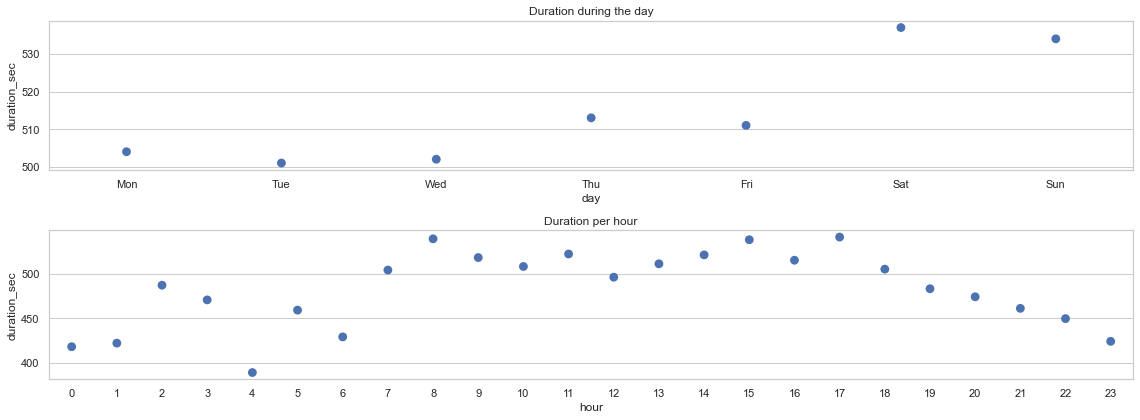

In [74]:
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
sns.pointplot(x='day',y='duration_sec',data=bikes,estimator=np.median,ci=None, dodge=True,
                sort=False, order=day_order, join=False);
plt.title('Duration during the day');
plt.subplot(2,1,2)
plt.title('Duration per hour');
sns.pointplot(x='hour',y='duration_sec',data=bikes,estimator=np.median,ci=None,join=False);
plt.tight_layout();

We observed earlier that the weekend have less bike rides. However the duration of a ride is in general longer in the weekend. In the night there is a peak in duration.

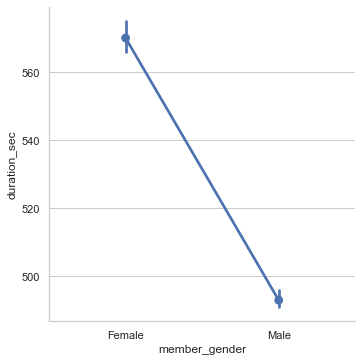

In [75]:
#observe the relation between median duration and gender
sns.catplot(data=bikes, y="duration_sec", x="member_gender",kind='point',estimator=np.median);

The generations X and Y have simualar patterns when using the bikes. With the bayboomers we can observe that they also have a peak in the morning and evening but this is not as high as the X and Y generation and between the morning and evening they use the bike more compared to X and Y. The Z generation have more a small peak in the evening and are using the bike more evenly spread during the weeek compared to the other three generations.


### Observations of interest

We explored the relation between the generation and the other features. 

We observed that the ratio between the males and females are a litle bit in favor of the males in all but the Y generation. The differences are only a few percent points.

The subscribers are in general a few percentage points higher then customers. However in the Z generation the customers are a little bit higher.

When looking at the bike share program we observe that the X and Y are a litle bit below the ratio (10/90) in favor of the non participants. The Z generation has almost twice the percentage of participants. The baby boomers have also a higher share in the participants then the ratio.

The Baby boomers are the ones with the longest rides. The Generation Z have in genral shorter rides. Be aware that the differences are smalle in absolute values.

When exploring the start and end stations for the different stations we observed that there are area's which have more starting/end points for a particular generation. Around Berkley we saw higher oncentrations of stations for the X generation. 

The X and Y generation are simular in bike renting in respect to the time of day and the day of the week. The Z generation is different in that aspect.



### Other observations
When exploring the travel routes from start to end we observe that not all possible combinations from start to end are used. We see that a ride starting in station 1 will end almost all of the time in 1 to 150 or 320 or above.
More groups of start end point combinations occure more often. 

We also discoverd that females in general travel a litle bit longer then males. In the weekend the travel is a bir longer as at certain times of the day.



## Multivariate Exploration

> Up to now we compared most features agains the generations we will add the combination of gender, user type and duration to it. Starting with the combination Generation, duration and gender.

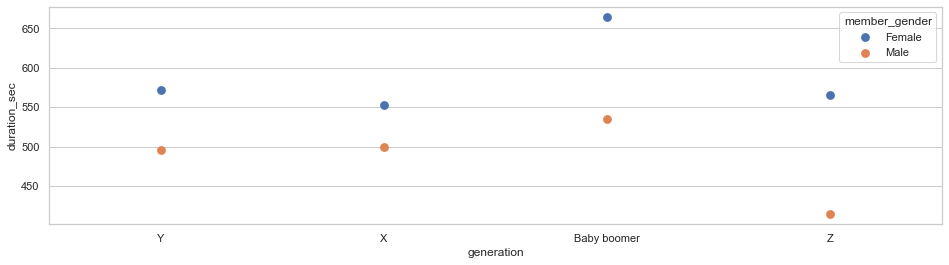

In [76]:
sns.pointplot(x='generation',y='duration_sec',data=bikes,hue='member_gender',
              estimator=np.median,ci=None, sort=False,  join=False);

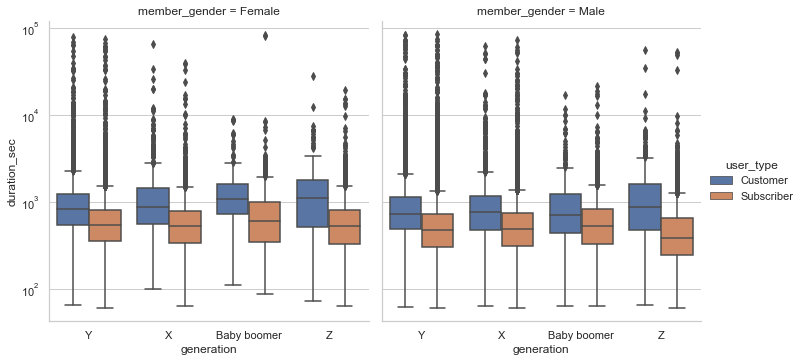

In [77]:
g=sns.catplot(y='duration_sec',x='generation',data=bikes,kind='box',hue='user_type',col='member_gender');
g.set(yscale='log');


We can observe a difference between the duration depending in user type
> Customers have longer rides. Approximatly at the 75% quartile of the customers we find the median of the subscribers

And we observe a difference in gender
> Females have a slightl longer ride compared to the males.

Next we explore the start and end stations for each generation


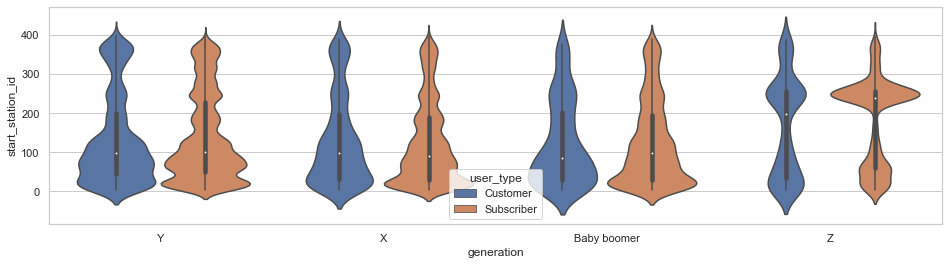

In [78]:
sns.violinplot(y='start_station_id',x='generation',data=bikes,hue='user_type');

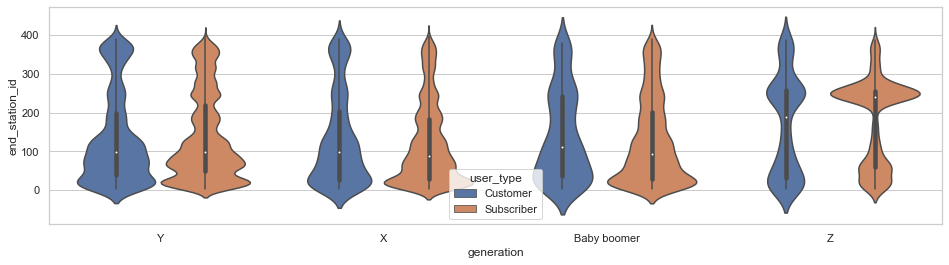

In [79]:
sns.violinplot(y='end_station_id',x='generation',data=bikes,hue='user_type');

We can observe a difference in the starting stations with regard to the user type
> There is a smalle difference in where they start end. The most outspoken difference can be seen at the Z generation.

Next we explore the day of the ride for the gender and generation

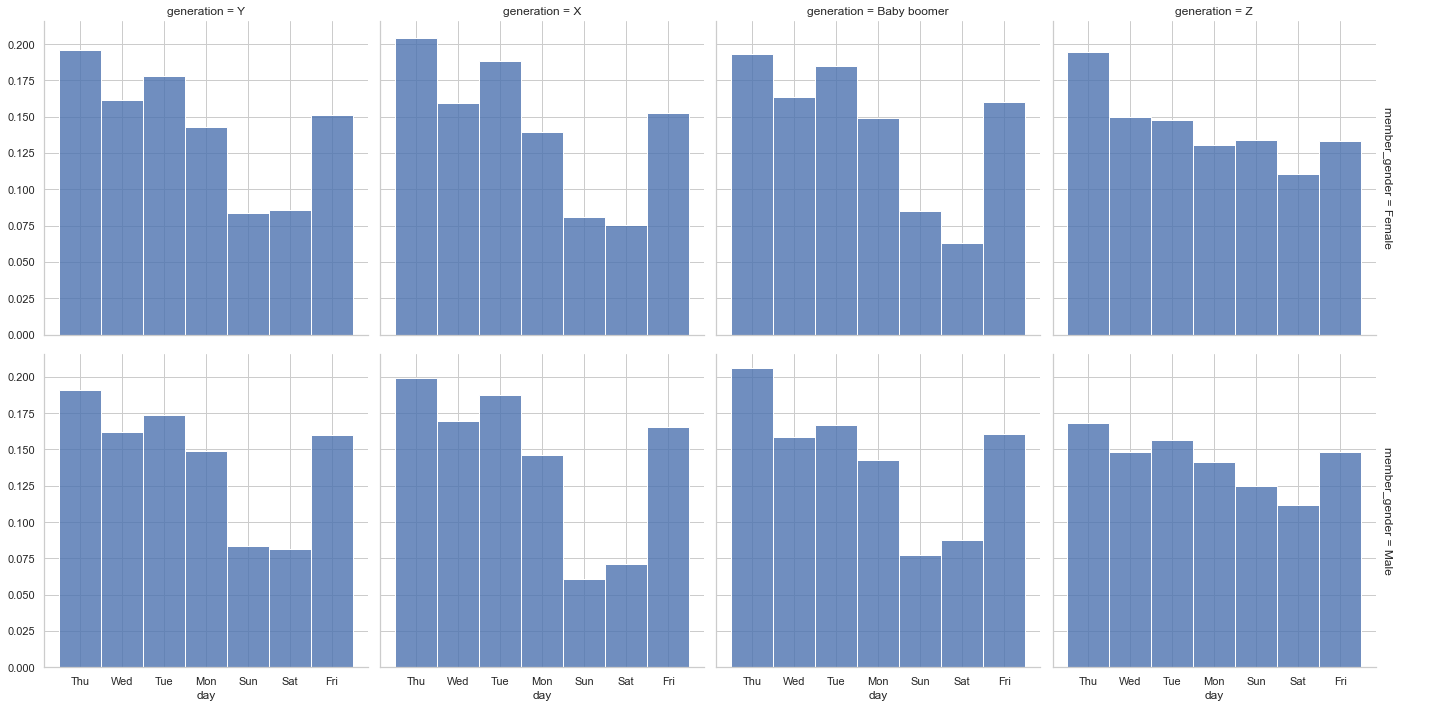

In [80]:
g=sns.FacetGrid(bikes,row='member_gender',col='generation', height=5,margin_titles=True)
g.map(sns.histplot,'day',bins=24,stat='density',common_norm=True,alpha=0.8);
g.add_legend();

There is not a huge difference betwee males and females when the generations are renting bikes.

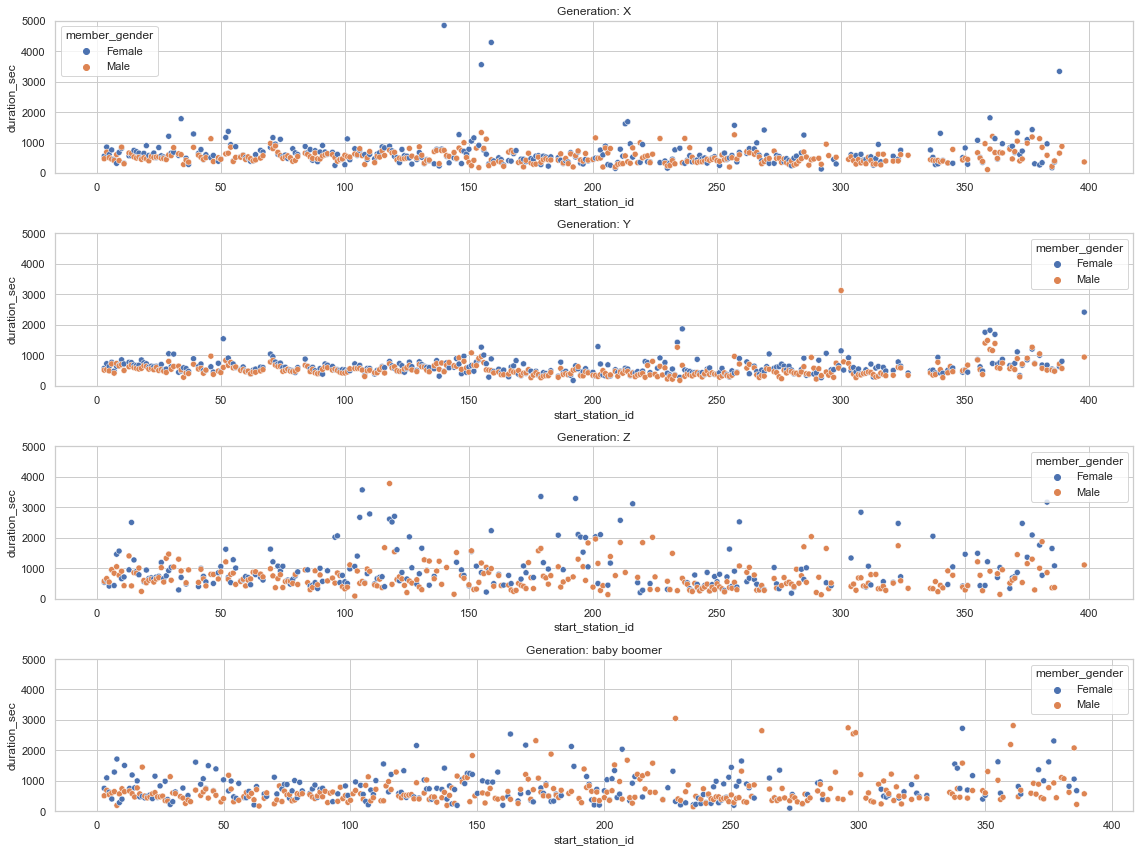

In [81]:
## get the traveling duration depending on the station.
y=pd.DataFrame(bikes.groupby(['start_station_id','generation', 'member_gender'])['duration_sec'].median().reset_index())
plt.figure(figsize=(16,12))
plt.subplot(4,1,1)
plt.title('Generation: X');
sns.scatterplot(data=y.query('generation == "X"'),x='start_station_id',y='duration_sec',hue='member_gender');
plt.ylim(0,5000);
plt.subplot(4,1,2)
plt.title('Generation: Y');
sns.scatterplot(data=y.query('generation == "Y"'),x='start_station_id',y='duration_sec',hue='member_gender');
plt.ylim(0,5000);
plt.subplot(4,1,3)
plt.title('Generation: Z');
sns.scatterplot(data=y.query('generation == "Z"'),x='start_station_id',y='duration_sec',hue='member_gender');
plt.ylim(0,5000);
plt.subplot(4,1,4)
plt.title('Generation: baby boomer');
sns.scatterplot(data=y.query('generation == "Baby boomer"'),x='start_station_id',y='duration_sec',hue='member_gender');
plt.ylim(0,5000);
plt.tight_layout()

In [82]:
# Next re-create a dataframe with for each station the start station id per generation subset
start_station_list=pd.DataFrame(bikes.groupby(['start_station_id','generation','member_gender']).size().reset_index())
end_station_list=pd.DataFrame(bikes.groupby(['end_station_id','generation','member_gender']).size().reset_index())

# apply the function to each row creating the relative count per station.
# below X[0] is the column with the number of starts for the particular station
start_station_list['relative']=start_station_list.apply(lambda x: set_station_count(x['generation'],x[0]),
                                            axis=1)
end_station_list['relative']=start_station_list.apply(lambda x: set_station_count(x['generation'],x[0]),
                                            axis=1)
start_station_list.set_axis(['start_station_id', 'generation', 'member_gender', 'total', 'relative'],axis=1,inplace=True)
start_station_list

start_station_id   generation member_gender  total  relative
0                    3  Baby boomer        Female      7  0.000942
1                    3  Baby boomer          Male     88  0.011838
2                    3            X        Female     81  0.002626
3                    3            X          Male    361  0.011703
4                    3            Y        Female    393  0.003524
...                ...          ...           ...    ...       ...
2627               398            X          Male      6  0.000195
2628               398            Y        Female      2  0.000018
2629               398            Y          Male      7  0.000063
2630               398            Z        Female      0  0.000000
2631               398            Z          Male      1  0.000093

[2632 rows x 5 columns]

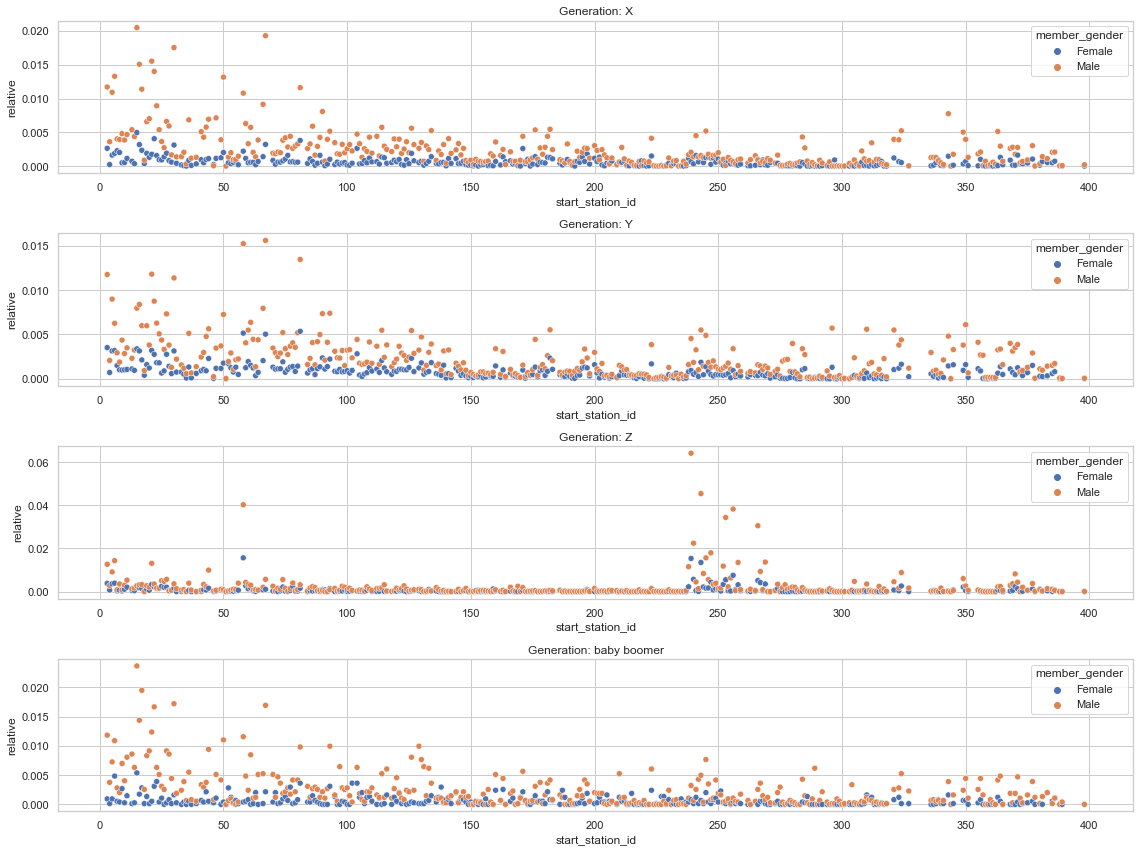

In [83]:
# get the relative number of starts depending on the station.
y=start_station_list
plt.figure(figsize=(16,12))
plt.subplot(4,1,1)
plt.title('Generation: X');
sns.scatterplot(data=y.query('generation == "X"'),x='start_station_id',y='relative',hue='member_gender');

plt.subplot(4,1,2)
plt.title('Generation: Y');
sns.scatterplot(data=y.query('generation == "Y"'),x='start_station_id',y='relative',hue='member_gender');

plt.subplot(4,1,3)
plt.title('Generation: Z');
sns.scatterplot(data=y.query('generation == "Z"'),x='start_station_id',y='relative',hue='member_gender');

plt.subplot(4,1,4)
plt.title('Generation: baby boomer');
sns.scatterplot(data=y.query('generation == "Baby boomer"'),x='start_station_id',y='relative',hue='member_gender');

plt.tight_layout()

In this last visual we can observe that per generation some starting stations are more frequently used then others. In general males use 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The gender data is missing for a small part of the datarows. Decided to drop these rows as we are intrested in complete data.

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [204]:
x=pd.DataFrame(bikes.groupby(['generation','start_station_id','end_station_id']).size().reset_index())
x['relative']=x.apply(lambda x: set_station_count(x['generation'],x[0]),
                                            axis=1)


In [205]:
x

generation  start_station_id  end_station_id   0  relative
0      Baby boomer                 3               5   2  0.000269
1      Baby boomer                 3               6   1  0.000135
2      Baby boomer                 3               9   4  0.000538
3      Baby boomer                 3              11  15  0.002018
4      Baby boomer                 3              13   1  0.000135
...            ...               ...             ...  ..       ...
35653            Z               386             109   3  0.000279
35654            Z               386             133   1  0.000093
35655            Z               386             358   1  0.000093
35656            Z               386             362   4  0.000372
35657            Z               398              98   1  0.000093

[35658 rows x 5 columns]

In [206]:
station_id_list=x.start_station_id.unique().tolist()
station_dict={}
station_list=[]
for point in station_id_list:
    start_row=x[x['start_station_id']== point]['relative'].argmax()
    generation =x[x['start_station_id']== point]['generation'].iloc[start_row]
    end_station =x[x['start_station_id']== point]['end_station_id'].iloc[start_row]
    relative =x[x['start_station_id']== point]['relative'].iloc[start_row]
    station_dict={'generation':generation,
                 'end_station':end_station,
                 'relative':relative,
                 "station_id":point}
    station_list.append(station_dict)
    
df=pd.DataFrame(station_list)
    
    

In [207]:
df

generation  end_station  relative  station_id
0              Z           58  0.002884           3
1    Baby boomer           93  0.001076           4
2              Z           58  0.004465           5
3              X           16  0.004085           6
4              X          200  0.000519           7
..           ...          ...       ...         ...
324            Y          237  0.000099         226
325            Z          237  0.000186         234
326            Z          288  0.000093         290
327            Y           35  0.000018         300
328            Y           23  0.000009         344

[329 rows x 4 columns]

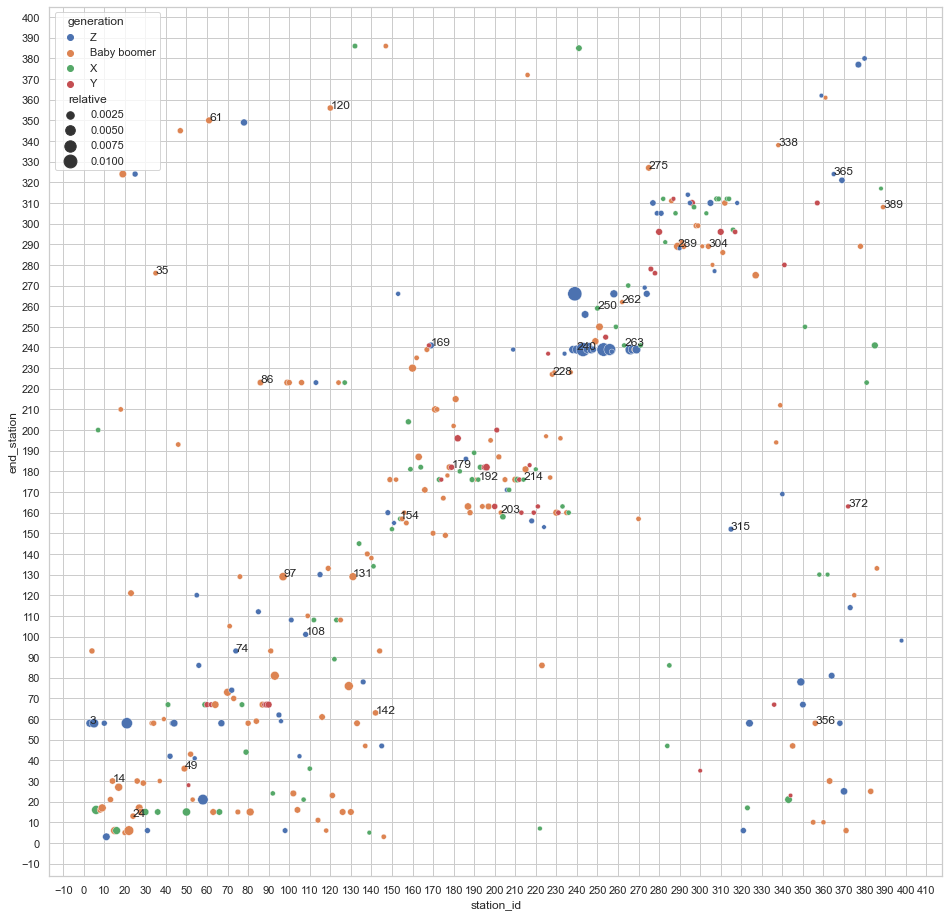

In [216]:
plt.figure(figsize=(16,16))
ax=sns.scatterplot(data=df,x='station_id', y='end_station',hue='generation',size='relative', sizes=(20,200));
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
for i in range(0,len(station_id_list),10):
    ax.annotate(df.iloc[i]['station_id'].astype(str), (station_id_list[i], df.iloc[i]['end_station']));